# Data Wrangling

##### Importing Essential Libraries

In [1]:

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering
### Gathering Data From The Provided Files & Executing Simple Code To View Their Content

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None


### Gather data from twitter API using Python's Tweepy library and store data

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder = 'image-predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
with open(os.path.join(folder, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder)

img_predictions_df = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
826,693280720173801472,https://pbs.twimg.com/media/CZ8HIsGWIAA9eXX.jpg,1,Labrador_retriever,0.340008,True,bull_mastiff,0.175316,True,box_turtle,0.164337,False
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False


In [4]:
key = " "
key_secret = " "
token = " "
token_secret = " "

auth = tweepy.OAuthHandler(key, key_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [5]:
tweet_ids = list(archive_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        #print(tweet_ids.index(tweet) + 1, "/", "2354")
    except:
        print("Error for: " + str(tweet))
        #print(tweet_ids.index(tweet) + 1, "/", "2354")

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Rate limit reached. Sleeping for: 309
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968
Error for: 754011816964026368
Rate limit reached. Sleeping for: 741
Rate limit reached. Sleeping for: 740


In [7]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [8]:
with open('tweet_json.txt') as file:
    data = json.load(file)

In [9]:
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']# + data[tweet_id]['favourites_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)

,tweet_id,retweets,favorites
1412,697881462549430272,1274,3179
1386,699446877801091073,2804,6253
1543,688804835492233216,209,1014
866,760641137271070720,1406,5275
921,753398408988139520,2083,6152


## Assess Data

In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
archive_df.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
2004,672466075045466113,NaN,NaN,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,None,None,None,None
1382,700864154249383937,NaN,NaN,2016-02-20 02:06:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,None,None,pupper,None


<b> checking various rating denominators and numerators for future references </b>

In [17]:
archive_df.rating_denominator.value_counts() 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
img_predictions_df.info()
img_predictions_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1633,805932879469572096,https://pbs.twimg.com/media/Cy8_qt0UUAAHuuN.jpg,1,Norwegian_elkhound,0.657967,True,keeshond,0.319136,True,Leonberg,0.007947,True
809,692158366030913536,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg,1,pug,0.956565,True,swing,0.018907,False,toy_poodle,0.013544,True
644,681579835668455424,https://pbs.twimg.com/media/CXV1Ot_W8AEpkQO.jpg,1,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True


In [16]:
tweets_df.info()
tweets_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id     2342 non-null object
retweets     2342 non-null int64
favorites    2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


,tweet_id,retweets,favorites
502,811744202451197953,1778,8112
767,775898661951791106,18021,0
1515,690248561355657216,440,1775



### Quality

In archive_df,the tweet_ID is not the right data type and value. I extracted the tweet_ID from expanded_urls, but still some tweet_ID is missing.

Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id

In archive_df, we only want original ratings (no retweets).So the retweets shouldn't be there.

We only want ratings with images. Not all ratings have images.

In archive_df, some ratings are wrong.

In archive_df, erroneous datatype for timestamp

In archive_df, nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.

In df1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets

In df1, some ratings are wrong.Rating_numerator and denominator should be one variable rating.

### Tidiness
In archive_df, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.
 
In archive_df, the columns 'doggo', 'floofer', 'pupper','puppo' show one variable.
 
tweets_df should be part of archive_df.
 
rating_numerator and denominator should be one variable rating

In [166]:
#creating copies of datasets ensuring that the original datasets are preserved for future references

In [87]:
df1_clean = archive_df.copy()
df2_clean = img_predictions_df.copy()
df3_clean = tweets_df.copy()

#### Issue
In df1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.

#### Define
Delete retweets and observations without ID, delete columns:retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

#### Code

In [88]:
df1_clean=df1_clean[df1_clean.tweet_id.notnull()]
df1_clean=df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean=df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [89]:
df1_clean.tweet_id=df1_clean.tweet_id.astype(str)

####  Test
using info() we can check the data types

In [90]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


#### Issue
We only want ratings with images. Not all ratings have images.

#### Define
Delete observations without image

#### Code

In [91]:
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
#image_id=df2_clean[['tweet_id']]
df1_clean=pd.merge(df1_clean,df2_clean,how = 'inner',on='tweet_id')

#### Test
we have merged df1_clean(archive_df) and df2_clean(img_predictions_df) on tweet_id

In [92]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       

In [93]:
# we have merged df1_clean(archive_df) and df2_clean(img_predictions_df) on tweet_id

#### Issue
One variable in four columns in df1. Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.

#### Define
Create column 'stage' to show dog stage, drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan.

#### Code

In [94]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.stage=df1_clean.stage.replace('',np.nan)

#### Test
using sample() we can check the desired output

In [95]:
df1_clean.sample(5) #Test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
316,821765923262631936,NaN,NaN,2017-01-18 17:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duchess. She uses dark doggo forces to...,https://twitter.com/dog_rates/status/821765923...,13,10,Duchess,...,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True,doggo
961,711732680602345472,NaN,NaN,2016-03-21 01:54:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to hear the joke this dog was just told...,https://twitter.com/dog_rates/status/711732680...,10,10,None,...,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True,NaN
394,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,...,Rottweiler,0.369530,True,miniature_pinscher,0.194867,True,kelpie,0.160104,True,NaN
1924,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,https://twitter.com/dog_rates/status/667188689...,10,10,None,...,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,...,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,puppo


#### Issue
df3 should be part of df1.

##### Define
Join df3 table to df1 table, joining on tweet_id.



#### Code

In [96]:
df3_clean=df3_clean[~(df3_clean.tweet_id.duplicated())]
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id',how='inner')

#### Test
info() can show the result of merger as the columns of df3 are added up

In [97]:
#test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3                       1993 non-null object
p3_conf                  1

#### Issue
In df1, erroneous datatype for timestamp

#### Define
Convert timestamp to datetime data type.

#### Code

In [98]:
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

#### Issue
In df1, nulls represented as 'None' in columns 'name'.

#### Define
Set the value wrong names to 'None' and replace 'None' with np.nan.

#### Code

In [99]:
df1_clean.name=df1_clean.name.replace('None',np.nan)

#### Test
The both above issues are resolved with these operations

#### Issue
In df1, some ratings are wrong.

Rating_numerator and denominator should be one variable rating.
#### Define
Change the rating_numerator and rating_denominator for oberservations with wrong value

Oberservations with tweet_id '810984652412424192'doesn't have a valid rating, so drop this row.

Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.

Drop oberservations with extreme ratings.

#### Code

In [100]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
799,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
847,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
890,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
924,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
945,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
969,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
987,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [101]:
df1_clean=df1_clean[df1_clean.tweet_id!='810984652412424192']
df1_clean.loc[df1_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df1_clean.loc[df1_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df1_clean.loc[df1_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df1_clean.loc[df1_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df1_clean.loc[df1_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df1_clean['rating']=df1_clean.rating_numerator/df1_clean.rating_denominator
df1_clean=df1_clean.drop(['rating_numerator','rating_denominator'],axis=1)

df1_clean.loc[df1_clean.rating>2,['tweet_id','text','rating']]

,tweet_id,text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
725,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1373,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1717,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


#### Test
The inaccurate data has been resolved by above operation while sort_values() give accurate rating in sorted manner

In [102]:
df1_clean=df1_clean[df1_clean.rating<2]

In [103]:
df1_clean.rating.sort_values().sample(15) #test

323     1.2
339     1.3
756     1.1
42      1.3
175     1.2
1758    1.1
803     1.2
900     1.1
1064    1.0
779     1.1
147     1.4
1650    1.0
1886    0.2
936     0.9
530     0.5
Name: rating, dtype: float64

#### Issue
Convert float variables (in_reply_to_status_id, in_reply_to_user_id) to object.

#### Define
Convert them to string.

#### Code

In [105]:
df1_clean.in_reply_to_status_id = df1_clean.in_reply_to_status_id.astype(str)
df1_clean.in_reply_to_user_id = df1_clean.in_reply_to_user_id.astype(str)


#### Test
Checking the data type using info()

In [106]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1992
Data columns (total 23 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
name                     1443 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf                  1987 non-null float64
p3_dog                   1987 non-null bool
stage          

#### Issue
There are NaNs present in retweets and favorites columns

#### Define
Fill the NaNs with  mean values

#### Code

In [114]:
mean_retweet = np.mean(df1_clean.retweets.dropna())
mean_favorite = np.mean(df1_clean.favorites.dropna())
print(mean_retweet, mean_favorite)

2669.36990438 8774.10518369


In [1]:
#printing the mean values

In [115]:
df1_clean.retweets = df1_clean.retweets.fillna(mean_retweet).astype('int64')
df1_clean.favorites = df1_clean.favorites.fillna(mean_favorite).astype('int64')

#### Tset
using info() and sample() we can check the desired changes here

### Final Test

In [116]:
df1_clean.info()
df1_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1992
Data columns (total 23 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    1987 non-null object
in_reply_to_user_id      1987 non-null object
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
name                     1443 non-null object
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1987 non-null bool
p3                       1987 non-null object
p3_conf                  1987 non-null float64
p3_dog                   1987 non-null bool
stage          

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,retweets,favorites,rating
829,735635087207878657,nan,nan,2016-05-26 00:54:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dakota. He hasn't grow into his skin yet. 11/10 would squeeze softly https://t.co/IvFSlNXpgj,"https://twitter.com/dog_rates/status/735635087207878657/photo/1,https://twitter.com/dog_rates/status/735635087207878657/photo/1",Dakota,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,...,goose,0.014377,False,fur_coat,0.008451,False,NaN,2525,6505,1.1
913,718454725339934721,nan,nan,2016-04-08 15:05:29,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pic is old but I hadn't seen it until today and had to share. Creative af. 13/10 very good boy, would pet well https://t.co/4kD16wMA1Z",https://twitter.com/dog_rates/status/718454725339934721/photo/1,NaN,https://pbs.twimg.com/media/Cfh2w6HWIAIIYAF.jpg,1,...,hatchet,0.115744,False,chime,0.068092,False,NaN,1607,5103,1.3
321,821044531881721856,nan,nan,2017-01-16 17:20:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flash. He went way too hard celebrating Martin Luther King Day last night. 12/10 now he's having a dream in his honor https://t.co/bryVdNaRcu,https://twitter.com/dog_rates/status/821044531881721856/photo/1,Flash,https://pbs.twimg.com/media/C2Tvo20XcAAhNL9.jpg,1,...,Airedale,0.133534,True,Tibetan_mastiff,0.120903,True,NaN,2511,13527,1.2
281,828046555563323392,nan,nan,2017-02-05 01:04:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sailer. He waits on the roof for his owners to come home. Nobody knows how he gets up there. H*ckin loyal af. 13/10 https://t.co/O37z4jaMG9,"https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1,https://twitter.com/dog_rates/status/828046555563323392/photo/1",Sailer,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,...,window_screen,0.131295,False,boathouse,0.046393,False,NaN,3121,12494,1.3
1659,672205392827572224,nan,nan,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,https://twitter.com/dog_rates/status/672205392827572224/photo/1,Opal,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,...,crate,0.035376,False,pug,0.003267,True,pupper,1197,2314,0.9


### Storing Data
Store the clean DataFrame df1_clean in a CSV file named twitter_archive_master.csv

In [117]:
df1_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyze & Visualize

In [119]:
df1_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,retweets,favorites,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,NaN,8377,38245,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,papillon,0.068957,True,NaN,6184,32787,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,NaN,4092,24690,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,8519,41572,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN,9225,39747,1.2


<b> Plotting Rating Distribution </b>

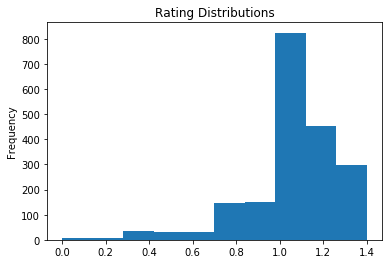

In [147]:
#Rating Distribution
df1_clean.rating.plot(kind = 'hist',title = 'Rating Distributions');

<b> The distribution chart shows that the 1.0 is the most common rating </b>

<b> Relationship between favorites and retweets </b>

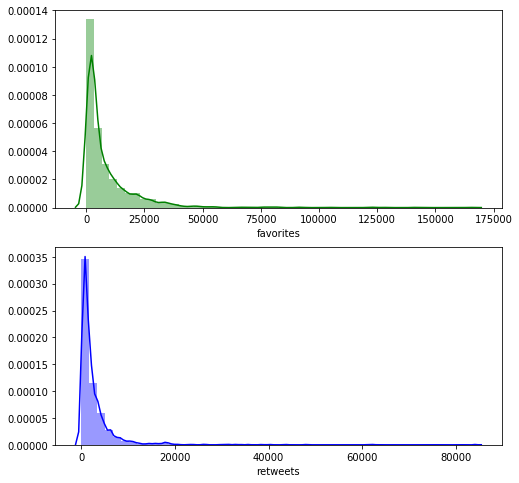

In [137]:
fig,axes = plt.subplots(2,1,figsize=(8,8))
sns.distplot(df1_clean.favorites, color = 'green', label = 'Favorites',ax=axes[0])

sns.distplot(df1_clean.retweets, color = 'blue', label = 'Retweets',ax=axes[1])

<b> The maximum populated range of retweets and favorites is 0 to 2000 and 0 to 50000 respectively </b>

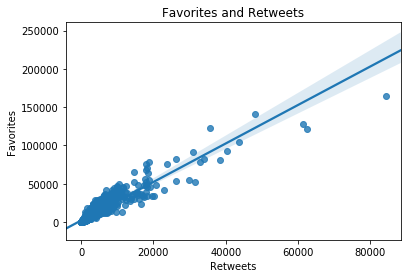

In [141]:
g = sns.regplot(x=df1_clean.retweets, y=df1_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot.png')

<b> The distribution of retweets and favorites over the time span </b>

In [149]:
df1_time = df1_clean.copy()
df1_time.set_index('timestamp', inplace=True)

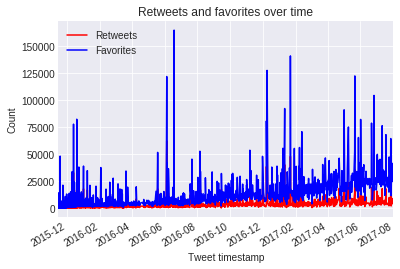

In [150]:
df1_time['retweets'].plot(color = 'red', label='Retweets')
df1_time['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show()

<b>The pattern is inconsistant with maximum favorites in around 2016-06 to 2016-08 while retweets have improved throughout</b>

<b> Plotting Distribution of Retweets and Favorites based on dog's gender </b>

In [154]:
male_words=set(["him","he's",'his',"he", "himself"])

female_words=set(["her", "she's","she", "herself"])

In [156]:
def gender_the_sentence(sentence_words):
    mw_length=len(male_words.intersection(sentence_words))
    fw_length=len(female_words.intersection(sentence_words))

    if mw_length>0 and fw_length==0:
        gender='male'
    elif mw_length==0 and fw_length>0: 
        gender='female'
    elif mw_length>0 and fw_length>0: 
        gender='both'
    else:
        gender='none'
    return gender

In [158]:
# clean the text column for applying for extracting gender
df1_clean['text']=df1_clean['text'].str.replace('.', '')
df1_clean['text']=df1_clean['text'].str.replace(',', '')

In [160]:
df1_clean['gender']=df1_clean['text'].str.lower().str.split(" ").apply(gender_the_sentence)

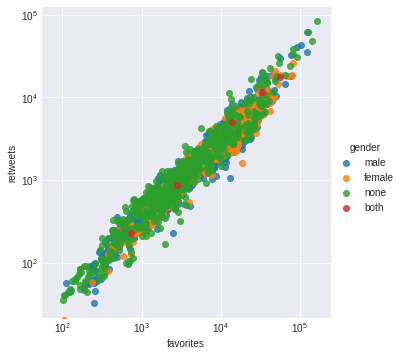

In [162]:
sns.lmplot(x="favorites", y="retweets",data=df1_clean, hue='gender', fit_reg=False)
plt.xscale('log');
plt.yscale('log');

<b> Based on the above distribution its difficult to draw conclusion as which gender receives more tweets/favorites</b>
<b>There are few blue dots at the top of chart though</b>

<b> Pie Chart showing percentage of dog stages in our data set </b>

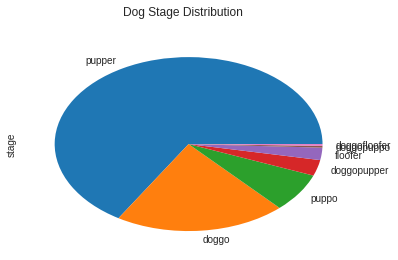

In [155]:
df1_clean[df1_clean.stage!='None'].stage.value_counts().plot.pie(subplots=True, title="Dog Stage Distribution");

<b>Pupper is the maximum in number while doggo follows next</b>

<b> Plotting Distribution of Retweets and Favorites based on dog's stage </b>

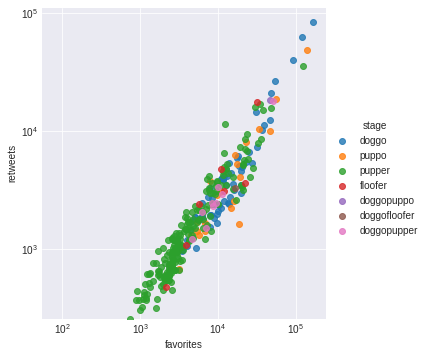

In [163]:
sns.lmplot(x="favorites", y="retweets",data=df1_clean, hue='stage', fit_reg=False)
plt.xscale('log');
plt.yscale('log');

<b>Evidently pupper has maximum numbers of tweets and favorites count</b>

In [ ]:
### Finish